# ANALYSIS of pySAM by Organized Simulations

Calcualtes RMSE & MBD, relative and absolutes

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import bifacial_radiance as br      # using the MBD and RMSE functions from here
import pvlib

In [13]:
df = pd.read_pickle('Results_pysam.pkl')


In [14]:
orga = pd.read_excel('..\Combinations.xlsx', skiprows = 20)
orga.fillna(method='ffill')

,Method,Sim,WeatherFile_Name,NOTES,DNI,DHI,GHI,POA,BOA,POABOA,...,AmbientTemperature,TrackerAngle,irrad_mod,sky_model,Module,Module Temperature,TestPOA,TestBOA,TestModuleTemp,TestPerformance
0,1,00,00,baseline,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
1,1,A01,A01,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
2,1,A02,A02,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
3,1,A03,A03,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
4,1,A04,A04,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
5,1,W01,W01,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
6,1,W02,W02,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
7,1,W03,W03,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
8,1,T01,T01,Test Temperature,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,1,0,0,2,All tree,NaN,-,-,Yes,Yes
9,1,T02,T02,Test Temperature,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,2,0,0,2,All tree,NaN,-,-,Yes,Yes


In [15]:
#InputFilesFolder = r'C:\Users\sayala\Documents\GitHub\Studies\Approaches2BifacialPerformanceMonitoring\InputFiles'
#weatherfile = os.path.join(InputFilesFolder,'WF_SAM_'+orga.loc[0]['WeatherFile_Name']+'.csv')


In [17]:
fielddataFolder = '..\FieldData'

try:
    data = pd.read_pickle(os.path.join(fielddataFolder,'DATA_Release.pickle'))
except AttributeError:
    raise Exception('Error: pandas needs to be >= 1.5.0 to read this pickle file')
        
print("Clean pickle loaded for Plotting Production Data, # datapoints: ", data.__len__())
print("Spanning from", data.index[0], " to ", data.index[-1])

filterdates = (data.index >= '2021-06-01')  & (data.index < '2022-06-01') 
data = data[filterdates].resample('60T', label='left', closed='left').mean().copy()


Clean pickle loaded for Plotting Production Data, # datapoints:  1665830
Spanning from 2019-07-01 00:02:00-07:00  to  2022-09-07 23:20:00-07:00


In [18]:
# Add other rows of calculations

# FRONT POA
#1
data['rowGfront_IMT_Average'] = data[['row3Gfront', 'row2Gfront', 'row5Gfront', 'row7Gfront', 'row9Gfront']].mean(axis=1)

# 9 --> NOTE: INCLUDED ROTATING ALBEDOMETER
data['rowGfront_ALL_Averages'] = data[['row3Gfront', 'row2Gfront', 'row3Gfront_CM11', 'row3Gfront_Licor',
                                      'row5Gfront', 'row7Gfront', 'row9Gfront', 'row7RotatingAlbedometer_CM11_Up']].mean(axis=1)

#10  --> NOTE: INCLUDED ROTATING ALBEDOMETER
data['rowGfront_Broadband_Averages'] = data[['row3Gfront_CM11', 'row3Gfront_Licor', 'row7RotatingAlbedometer_CM11_Up']].mean(axis=1)

# REAR POA

#0
data['row3Grear_IMT_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East']].mean(axis=1)

#14
data['rowGrear_IMT_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East',
                                     'row5Grear', 'row7Grear', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East']].mean(axis=1)

#15  --> NOTE: DID NOT INCLUDE ROTATING ALBEDOMETER
data['rowGrear_ALL_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East',
                                     'row5Grear', 'row7Grear', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East',
                                     'row3Grear_CM11', 'row3Grear_Licor']].mean(axis=1)

data['rowGrear_Broadband_Averages'] = data[['row3Grear_CM11', 'row3Grear_Licor']].mean(axis=1)


# WIND
data['rowFieldWindSpeedAverage'] = data[['row7wind_speed','row2wind_speed']].mean(axis=1)


# ALBEDO BASELINE..?

data['sunkity_CM11_GRI_over_SRRL_GHI'] = data['sunkitty_GRI_CM22'] / data['SRRL_GHI']

In [19]:
# Some plots / sanity checks

## MBD RMSE stuff

In [34]:
measfront  = data.row3Gfront
measrear  = data.row3Grear_IMT_Averages
meastemp = data.row2tmod_1

In [42]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    foo = df.loc[df['Sim'] == sim].set_index('datetimes').sort_index()
    modper2 = foo['Power2'].values
    modfront2 = foo['Front2'].values
    modrear2  = foo['Rear2'].values
    modtemp2  = foo['CellTemp2'].values
    
    modper4 = foo['Power4'].values
    modfront4 = foo['Front4'].values
    modrear4  = foo['Rear4'].values
    modtemp4  = foo['CellTemp4'].values
    
    modper8 = foo['Power8'].values
    modfront8 = foo['Front8'].values
    modtemp8  = foo['Power8'].values
    
    modper9 = foo['Power9'].values
    modfront9 = foo['Front9'].values
    modrear9  = foo['Rear9'].values
    modtemp9  = foo['CellTemp9'].values

    sim_all.append(sim)

    MBD_power2.append(br.performance.MBD(data.Yf2, modper2)) 
    MBD_power4.append(br.performance.MBD(data.Yf4, modper4))
    MBD_power8.append(br.performance.MBD(data.Yf8, modper8))
    MBD_power9.append(br.performance.MBD(data.Yf9, modper9))
    
    MBD_Gfront2.append(br.performance.MBD(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.MBD(measfront, modfront4))
    MBD_Gfront8.append(br.performance.MBD(measfront, modfront8))
    MBD_Gfront9.append(br.performance.MBD(measfront, modfront9))

    MBD_Grear2.append(br.performance.MBD(measrear, modrear2))
    MBD_Grear4.append(br.performance.MBD(measrear, modrear4))
    MBD_Grear9.append(br.performance.MBD(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.MBD(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.MBD(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.MBD(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.MBD(meastemp, modtemp9))
    
MBDres = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [43]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    foo = df.loc[df['Sim'] == sim].set_index('datetimes').sort_index()
    modper2 = foo['Power2'].values
    modfront2 = foo['Front2'].values
    modrear2  = foo['Rear2'].values
    modtemp2  = foo['CellTemp2'].values
    
    modper4 = foo['Power4'].values
    modfront4 = foo['Front4'].values
    modrear4  = foo['Rear4'].values
    modtemp4  = foo['CellTemp4'].values
    
    modper8 = foo['Power8'].values
    modfront8 = foo['Front8'].values
    modtemp8  = foo['CellTemp8'].values
    
    modper9 = foo['Power9'].values
    modfront9 = foo['Front9'].values
    modrear9  = foo['Rear9'].values
    modtemp9  = foo['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.RMSE(data.Yf2, modper2)) 
    MBD_power4.append(br.performance.RMSE(data.Yf4, modper4))
    MBD_power8.append(br.performance.RMSE(data.Yf8, modper8))
    MBD_power9.append(br.performance.RMSE(data.Yf9, modper9))
    
    MBD_Gfront2.append(br.performance.RMSE(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.RMSE(measfront, modfront4))
    MBD_Gfront8.append(br.performance.RMSE(measfront, modfront8))
    MBD_Gfront9.append(br.performance.RMSE(measfront, modfront9))

    MBD_Grear2.append(br.performance.RMSE(measrear, modrear2))
    MBD_Grear4.append(br.performance.RMSE(measrear, modrear4))
    MBD_Grear9.append(br.performance.RMSE(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.RMSE(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.RMSE(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.RMSE(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.RMSE(meastemp, modtemp9))

RMSE = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [44]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    foo = df.loc[df['Sim'] == sim].set_index('datetimes').sort_index()
    modper2 = foo['Power2'].values
    modfront2 = foo['Front2'].values
    modrear2  = foo['Rear2'].values
    modtemp2  = foo['CellTemp2'].values
    
    modper4 = foo['Power4'].values
    modfront4 = foo['Front4'].values
    modrear4  = foo['Rear4'].values
    modtemp4  = foo['CellTemp4'].values
    
    modper8 = foo['Power8'].values
    modfront8 = foo['Front8'].values
    modtemp8  = foo['CellTemp8'].values
    
    modper9 = foo['Power9'].values
    modfront9 = foo['Front9'].values
    modrear9  = foo['Rear9'].values
    modtemp9  = foo['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.MBD_abs(data.Yf2, modper2)) 
    MBD_power4.append(br.performance.MBD_abs(data.Yf4, modper4))
    MBD_power8.append(br.performance.MBD_abs(data.Yf8, modper8))
    MBD_power9.append(br.performance.MBD_abs(data.Yf9, modper9))
    
    MBD_Gfront2.append(br.performance.MBD_abs(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.MBD_abs(measfront, modfront4))
    MBD_Gfront8.append(br.performance.MBD_abs(measfront, modfront8))
    MBD_Gfront9.append(br.performance.MBD_abs(measfront, modfront9))

    MBD_Grear2.append(br.performance.MBD_abs(measrear, modrear2))
    MBD_Grear4.append(br.performance.MBD_abs(measrear, modrear4))
    MBD_Grear9.append(br.performance.MBD_abs(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.MBD_abs(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.MBD_abs(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.MBD_abs(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.MBD_abs(meastemp, modtemp9))

MBD_abs = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [45]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    foo = df.loc[df['Sim'] == sim].set_index('datetimes').sort_index()
    modper2 = foo['Power2'].values
    modfront2 = foo['Front2'].values
    modrear2  = foo['Rear2'].values
    modtemp2  = foo['CellTemp2'].values
    
    modper4 = foo['Power4'].values
    modfront4 = foo['Front4'].values
    modrear4  = foo['Rear4'].values
    modtemp4  = foo['CellTemp4'].values
    
    modper8 = foo['Power8'].values
    modfront8 = foo['Front8'].values
    modtemp8  = foo['CellTemp8'].values
    
    modper9 = foo['Power9'].values
    modfront9 = foo['Front9'].values
    modrear9  = foo['Rear9'].values
    modtemp9  = foo['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.RMSE_abs(data.Yf2, modper2)) 
    MBD_power4.append(br.performance.RMSE_abs(data.Yf4, modper4))
    MBD_power8.append(br.performance.RMSE_abs(data.Yf8, modper8))
    MBD_power9.append(br.performance.RMSE_abs(data.Yf9, modper9))
    
    MBD_Gfront2.append(br.performance.RMSE_abs(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.RMSE_abs(measfront, modfront4))
    MBD_Gfront8.append(br.performance.RMSE_abs(measfront, modfront8))
    MBD_Gfront9.append(br.performance.RMSE_abs(measfront, modfront9))

    MBD_Grear2.append(br.performance.RMSE_abs(measrear, modrear2))
    MBD_Grear4.append(br.performance.RMSE_abs(measrear, modrear4))
    MBD_Grear9.append(br.performance.RMSE_abs(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.RMSE_abs(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.RMSE_abs(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.RMSE_abs(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.RMSE_abs(meastemp, modtemp9))

RMSE_abs = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [46]:
RMSE_abs
MBDres
MBD_abs
RMSE
RMSE_abs

,Sim,MBD_power2,MBD_power4,MBD_power8,MBD_power9,MBD_Gfront2,MBD_Gfront4,MBD_Gfront8,MBD_Gfront9,MBD_Grear2,MBD_Grear4,MBD_Grear9,MBD_Modtemp2,MBD_Modtemp4,MBD_Modtemp8,MBD_Modtemp9
0,00,0.079302,0.059763,0.080241,0.104689,55.734794,55.734794,55.734794,89.367845,23.347858,22.724622,23.542678,8.641612,8.642132,8.651375,8.852250
1,A01,0.080384,0.060938,0.080309,0.105026,55.793459,55.793459,55.793459,89.414309,22.145681,21.514934,22.205579,8.636312,8.636710,8.651321,8.848324
2,A02,0.080936,0.061365,0.080348,0.105130,55.824201,55.824201,55.824201,89.461054,20.837449,20.224240,20.791707,8.636618,8.636613,8.651278,8.848470
3,A03,0.082140,0.062414,0.080396,0.105435,55.828426,55.828426,55.828426,89.460774,17.881507,17.333607,17.989986,8.636879,8.636165,8.650925,8.848081
4,A04,0.078635,0.059345,0.080211,0.105093,55.733024,55.733024,55.733024,89.389658,28.758919,28.136842,28.350020,8.665571,8.667838,8.651398,8.877753
5,W01,0.077645,0.058764,0.078903,0.104664,55.734794,55.734794,55.734794,89.367845,23.347858,22.724622,23.542678,8.632640,8.547654,8.568582,8.768085
6,W02,0.078512,0.059281,0.079640,0.104683,55.734794,55.734794,55.734794,89.367845,23.347858,22.724622,23.542678,8.621879,8.586544,8.600656,8.799707
7,W03,0.078391,0.059227,0.079794,0.104765,55.734794,55.734794,55.734794,89.367845,23.347858,22.724622,23.542678,8.667500,8.609399,8.626666,8.823173
8,T01,0.079436,0.059867,0.080738,0.104741,55.734839,55.734839,55.734839,89.367850,23.347841,22.724605,23.542668,8.637042,8.647236,8.655026,8.855748
9,T02,0.078739,0.059327,0.080177,0.104704,55.734635,55.734635,55.734635,89.367739,23.350081,22.724649,23.542690,8.651406,8.649409,8.659008,8.859881


In [47]:
RMSE

,Sim,MBD_power2,MBD_power4,MBD_power8,MBD_power9,MBD_Gfront2,MBD_Gfront4,MBD_Gfront8,MBD_Gfront9,MBD_Grear2,MBD_Grear4,MBD_Grear9,MBD_Modtemp2,MBD_Modtemp4,MBD_Modtemp8,MBD_Modtemp9
0,00,18.101045,12.838081,19.154226,23.686380,11.806066,11.806066,11.806066,18.893903,44.188000,43.008468,44.836615,49.176526,49.179489,49.232083,50.375196
1,A01,18.359786,13.098898,19.170465,23.772632,11.818493,11.818493,11.818493,18.903726,41.446669,40.283448,42.344497,49.146369,49.148634,49.231776,50.352858
2,A02,18.485919,13.190567,19.179815,23.796097,11.825005,11.825005,11.825005,18.913609,38.603228,37.467204,39.647921,49.148110,49.148080,49.231532,50.353686
3,A03,18.761003,13.416024,19.191203,23.865223,11.825900,11.825900,11.825900,18.913550,33.634207,32.610611,34.269722,49.149595,49.145530,49.229522,50.351475
4,A04,17.864327,12.685413,19.146990,23.636375,11.805691,11.805691,11.805691,18.898515,50.745957,49.659089,52.430901,49.312868,49.325768,49.232218,50.520326
5,W01,17.722972,12.623476,18.834735,23.680609,11.806066,11.806066,11.806066,18.893903,44.188000,43.008468,44.836615,49.125470,48.641844,48.760936,49.896245
6,W02,17.920880,12.734555,19.010692,23.684944,11.806066,11.806066,11.806066,18.893903,44.188000,43.008468,44.836615,49.064232,48.863156,48.943460,50.076193
7,W03,17.893085,12.722821,19.047440,23.703436,11.806066,11.806066,11.806066,18.893903,44.188000,43.008468,44.836615,49.323847,48.993215,49.091474,50.209729
8,T01,18.131656,12.860295,19.272730,23.698143,11.806076,11.806076,11.806076,18.893904,44.187968,43.008435,44.836596,49.150522,49.208534,49.252860,50.395104
9,T02,17.972585,12.744439,19.138978,23.689667,11.806033,11.806033,11.806033,18.893881,44.192208,43.008518,44.836638,49.232264,49.220897,49.275524,50.418621


In [48]:
data.keys()

Index(['row2kWh', 'row2dcp', 'row2Gfront', 'Hydra_current_1',
       'Hydra_current_10', 'Hydra_current_11', 'Hydra_current_12',
       'Hydra_current_2', 'Hydra_current_3', 'Hydra_current_4',
       'Hydra_current_5', 'Hydra_current_6', 'Hydra_current_7',
       'Hydra_current_8', 'Hydra_current_9', 'row2temperature_ambient',
       'row2tmod_1', 'row2tmod_2', 'row2wind_direction', 'row2wind_speed',
       'row3Gfront', 'row3Grear_IMT_West', 'row3Grear_IMT_CenterWest',
       'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East', 'row3Grear_CM11',
       'row3Grear_Licor', 'row3Gfront_CM11', 'row3Gfront_Licor', 'row4kWh',
       'row4dcp', 'row4tmod_1', 'row4tmod_2', 'row5Grear', 'row5Gfront',
       'row5temperature_ambient', 'row6tracker_angle', 'row7Grear',
       'row7Gfront', 'row7tracker_angle', 'row7wind_direction',
       'row7wind_speed', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East',
       'row7RotatingAlbedometer_CM11_Down', 'row7RotatingAlbedometer_CM11_Up',
       'row8dcp

In [49]:
df['Sim'].unique()

array(['00', 'A01', 'A02', 'A03', 'A04', 'W01', 'W02', 'W03', 'T01',
       'T02', 'T03', 'T04', 'S01', 'S02', 'S03', 'S04', 'S05', 'S07',
       'P00', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08',
       'P09', 'P10', 'PB00', 'PB01', 'PB02', 'PB03', 'PB04', 'PB05',
       'PB06', 'PB07', 'PB08', 'PB09', 'PB10', 'PB11', 'PB12', 'PB13',
       'PB14', 'PB15', 'PB16', 'PB17', 'PB18'], dtype=object)

In [50]:
df.keys()

Index(['Sim', 'Power2', 'CellTemp2', 'Rear2', 'Front2', 'Power4', 'CellTemp4',
       'Rear4', 'Front4', 'Power8', 'CellTemp8', 'Front8', 'Power9',
       'CellTemp9', 'Rear9', 'Front9', 'DNI', 'DHI', 'Alb', 'index',
       'datetimes', 'Year', 'Month', 'Hour'],
      dtype='object')

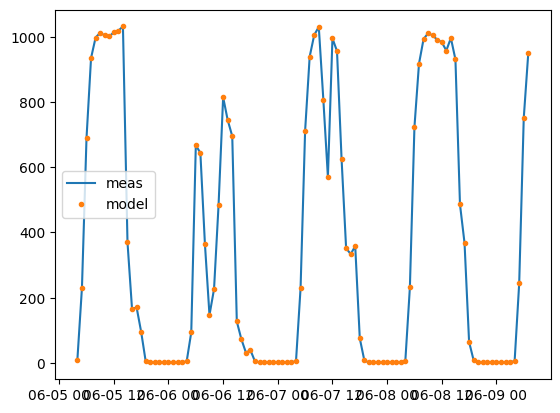

In [68]:
foo = df.loc[df['Sim'] == 'P00'].set_index('datetimes').sort_index()

plt.plot(data.row3Gfront.iloc[100:200], label='meas')
plt.plot(foo['Front2'].iloc[100:200], '.',label='model')
plt.legend()

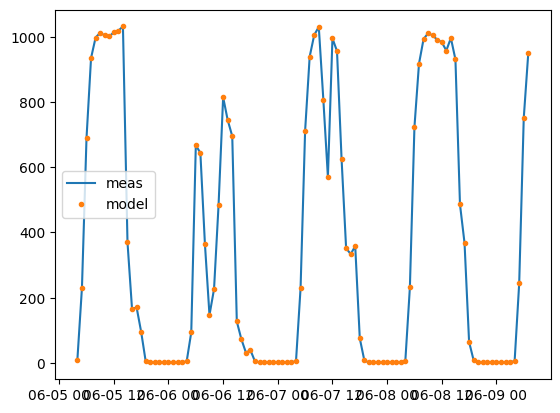

In [89]:
foo = df.loc[df['Sim'] == 'P00'].set_index('datetimes').sort_index()

plt.plot(data.row3Gfront.iloc[100:200], label='meas')
plt.plot(foo['Front2'].iloc[100:200], '.',label='model')
plt.legend()

In [83]:
foo.keys()

Index(['Sim', 'Power2', 'CellTemp2', 'Rear2', 'Front2', 'Power4', 'CellTemp4',
       'Rear4', 'Front4', 'Power8', 'CellTemp8', 'Front8', 'Power9',
       'CellTemp9', 'Rear9', 'Front9', 'DNI', 'DHI', 'Alb', 'index', 'Year',
       'Month', 'Hour'],
      dtype='object')

In [91]:
df.loc[df['Sim'] == 'P00']['Front4'].head(14)

157680     1.660189
157681     1.667636
157682     1.686758
157683     1.689823
157684     1.699245
157685     1.714741
157686     1.713749
157687     3.210016
157688    10.355037
157689    12.071537
157690    17.434790
157691    21.335430
157692    26.426296
157693    32.779072
Name: Front4, dtype: float64

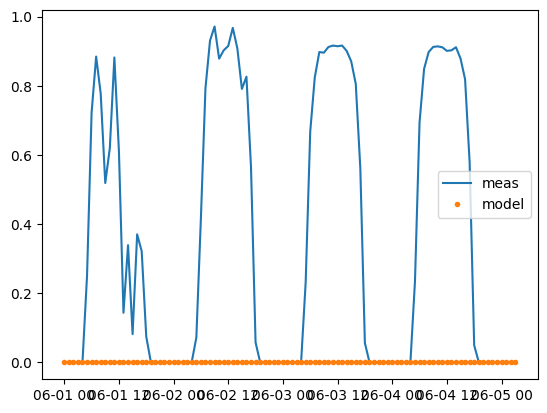

In [85]:
foo = df.loc[df['Sim'] == 'P03'].set_index('datetimes').sort_index()

plt.plot(data.Yf4.iloc[0:100], label='meas')
plt.plot(foo['Power9'].iloc[0:100], '.',label='model')
plt.legend()

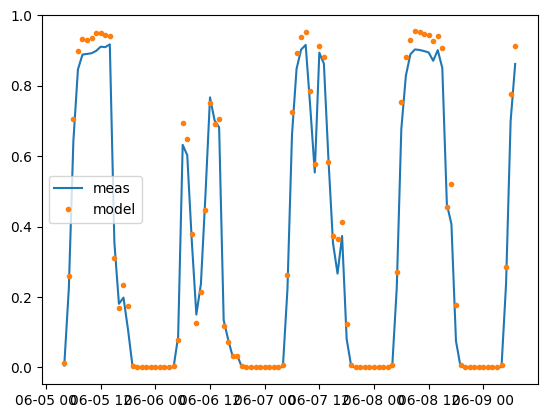

In [71]:
foo = df.loc[df['Sim'] == '00'].set_index('datetimes').sort_index()

plt.plot(data.Yf4.iloc[100:200], label='meas')
plt.plot(foo['Power4'].iloc[100:200], '.',label='model')
plt.legend()

In [ ]:
plt.plot(data.Yf4.values, label='meas')
plt.plot(df.loc[df['Sim'] == '00']['Power4'].values, label='model')
plt.legend()

In [ ]:
plt.plot(df.loc[df['Sim'] == '00']['Power9'].values, label='model')
plt.plot(data.Yf9.values, label='meas')
plt.legend()

In [ ]:
plt.plot(data.PR9.values, df.loc[df['Sim'] == '00']['Power9'].values, '.')
plt.xlim([0, 1.2])